In [ ]:
import numpy as np
import pandas as pd
import json
import io
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
from sklearn import preprocessing


In [2]:
# import the data
df_path = "C:/Users/johan/OneDrive/Desktop/archive/Bitcoin_tweets.csv"
df = pd.read_csv(df_path)

df.head(10)

C:\Users\johan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


In [3]:
df. dropna(subset = ["hashtags"], inplace=True)
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False


In [4]:
print("Tweet Size: ", len(df))

Tweet Size:  2242635


In [5]:
#start = df.index.searchsorted(0)

In [6]:
#end = df.index.searchsorted(500)

In [7]:
#df = df.iloc[start:end]

In [8]:
df.drop(["user_name","user_description", "user_created","user_location"], axis=1, inplace=True)
df.drop(df.loc[df.user_verified.isna()].index, axis=0, inplace=True)

In [9]:
df["hashtags"]=df["hashtags"].apply(lambda s : s[1:-1].split(',') if isinstance(s,str) else [])
df["hashtags_len"]=df["hashtags"].apply(len)

In [10]:
df.tail(5)

,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_len
2259783,144.0,341.0,5711.0,False,2022-01-19 19:08:16,"#BTC even broke the $42,000 support. A clear b...",['BTC'],Twitter Web App,False,1
2259784,148.0,286.0,3005.0,False,2022-01-19 19:08:08,@ETHFanToken we eating dips like no other ever...,"['EthFans', 'Ethereum', 'btc', 'HODL', 'Et...",Twitter for iPhone,False,14
2259785,36.0,206.0,207.0,False,2022-01-19 19:08:02,The agitation at these price levels is unwarra...,"['cryptocurrency', 'cryptocrash', 'BTC', 'E...",Twitter Web App,False,7
2259786,19.0,343.0,112.0,False,2022-01-19 19:07:54,Wake me when it's over. #Crypto #btc #Ethereum,"['Crypto', 'btc', 'Ethereum']",Twitter Web App,False,3
2259787,845.0,207.0,24205.0,False,2022-01-19 19:07:52,"#ElSalvador, the first country to make #Bitcoi...","['ElSalvador', 'Bitcoin', 'BTC', 'BTCwallet...",Twitter Web App,False,6


In [11]:
def conv_to_int(val):
    if isinstance(val, str):
        return 0
    else:
        return float(val)
df["user_followers"]=df["user_followers"].apply(lambda x : conv_to_int(x))
df["user_friends"]=df["user_friends"].apply(lambda x : conv_to_int(x))
df["user_favourites"]=df["user_favourites"].apply(lambda x : conv_to_int(x))

In [12]:
def clean_text(text):
    if(isinstance(text, str)):
        text = text.replace("#","")
        text = re.sub('\\n', '', text)
        text = re.sub('https:\/\/\S+', '', text)
        return text
    else:
        return ""

df["clean_text"]=df["text"].apply(clean_text)
df.drop("text", axis=1, inplace=True)

In [13]:
df["date"]=pd.to_datetime(df["date"],errors='coerce')
df["date"]=df["date"].apply(lambda x: x.date() )

In [14]:
def generate_impact_score(tweet):
    coef_verified = 1.1 if tweet.user_verified else 1
    coef_hashtags = 1+(tweet.hashtags_len/20)
    return ((tweet.user_followers + (tweet.user_friends/4))*coef_verified*coef_hashtags)/100

In [15]:
df["impact_score"]=df.apply(generate_impact_score, axis=1)

In [16]:
import yfinance as yf
btc_stock=yf.Ticker("BTC-USD")

In [17]:
start = min(df['date'])
end = max(df['date'])
btc_stock = btc_stock.history(start=start, end=end)

C:\Users\johan\AppData\Local\Temp/ipykernel_18348/859791989.py:1: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  start = min(df['date'])
C:\Users\johan\AppData\Local\Temp/ipykernel_18348/859791989.py:2: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  end = max(df['date'])


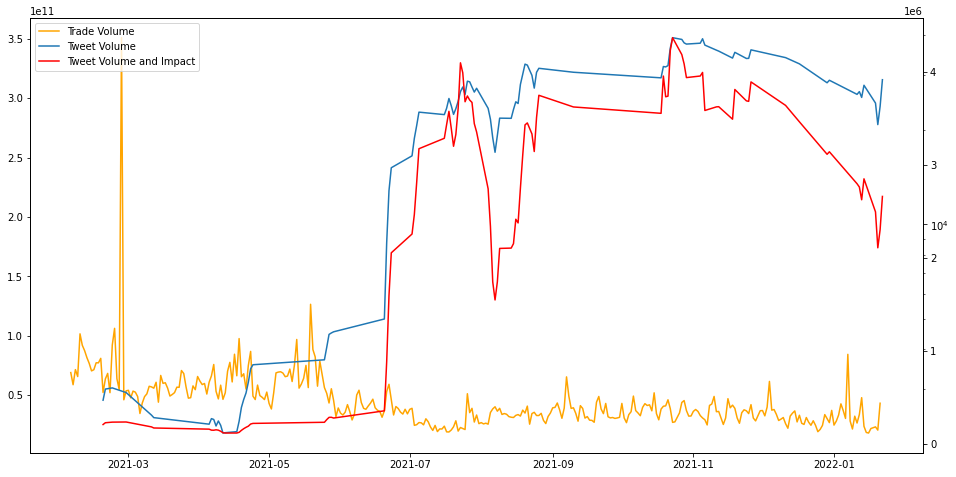

Spearman correlation - tweets: corr=-0.5438185334438442 pval=1.1846717484217466e-09
Spearman correlation - impact tweets: corr=-0.5819543285032439 pval=3.962587162270993e-11


In [18]:
tweet_shift1 = df.groupby('date').size().shift(-1).dropna() 
tweet_shift1_impact = df.groupby('date')["impact_score"].sum().shift(-1).dropna() 

stocks_data = btc_stock['Volume'].dropna()

corr, pval = stat.spearmanr(tweet_shift1.reindex(stocks_data.index), stocks_data,nan_policy='omit')
corr_i, pval_i = stat.spearmanr(tweet_shift1_impact.reindex(stocks_data.index), stocks_data,nan_policy='omit')

tweets_vol = df.groupby('date').size().rolling(10).mean().dropna()
tweets_vol_impact= df.groupby('date')["impact_score"].sum().rolling(10).mean().dropna()

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
ax.tick_params(axis='y')

ax2 = ax.twinx()
ax2.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
ax2.set_yscale('log')
ax2.tick_params(axis='y')

ax3=ax.twinx()
ax3.plot(tweets_vol_impact.index,tweets_vol_impact,label='Tweet Volume and Impact', color='red')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=0)

plt.show()

print("Spearman correlation - tweets: corr={} pval={}".format(corr,pval))
print("Spearman correlation - impact tweets: corr={} pval={}".format(corr_i,pval_i))

In [19]:
df.head()

,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,hashtags_len,clean_text,impact_score
0,8534.0,0.0,0.0,False,2021-02-10,['bitcoin'],Twitter Web App,False,1,Blue Ridge Bank shares halted by NYSE after bi...,98.56770
1,6769.0,0.0,0.0,False,2021-02-10,"['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,4,"😎 Today, that's this Thursday, we will do a ""🎬...",89.35080
3,625.0,0.0,0.0,False,2021-02-10,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,4,$BTC A big chance in a billion! Price: \487264...,8.25000
4,1249.0,0.0,0.0,False,2021-02-10,['BTC'],Twitter Web App,False,1,This network is secured by 9 508 nodes as of t...,14.42595
5,742.0,0.0,0.0,False,2021-02-10,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False,3,💹 Trade Crypto on Binance 📌 Enjoy Cashback 10%...,9.38630


In [20]:
df.drop(['user_followers','user_friends','user_favourites','hashtags','source','is_retweet','hashtags_len', 'user_verified'],inplace=True, axis = 1)
df.head()

,date,clean_text,impact_score
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after bi...,98.56770
1,2021-02-10,"😎 Today, that's this Thursday, we will do a ""🎬...",89.35080
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,8.25000
4,2021-02-10,This network is secured by 9 508 nodes as of t...,14.42595
5,2021-02-10,💹 Trade Crypto on Binance 📌 Enjoy Cashback 10%...,9.38630


In [22]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
import timeit

start = timeit.default_timer()
tqdm.pandas(desc ='Processing Rows')
def get_polarity_score(tweet):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(tweet)["compound"]
    
def get_polarity_cat(score):
    if score >=0.05 : 
        return "positive"
    elif score <=-0.05:
        return "negative"
    else:
        return "neutral"

df["polarity_score"]=df["clean_text"].apply(get_polarity_score)
df["polarity_cat"]=df["polarity_score"].apply(get_polarity_cat)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  13077.406470900001


In [24]:
df.head()

,date,clean_text,impact_score,polarity_score,polarity_cat
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after bi...,98.56770,0.2960,positive
1,2021-02-10,"😎 Today, that's this Thursday, we will do a ""🎬...",89.35080,0.6808,positive
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,8.25000,0.3164,positive
4,2021-02-10,This network is secured by 9 508 nodes as of t...,14.42595,0.4019,positive
5,2021-02-10,💹 Trade Crypto on Binance 📌 Enjoy Cashback 10%...,9.38630,0.4939,positive


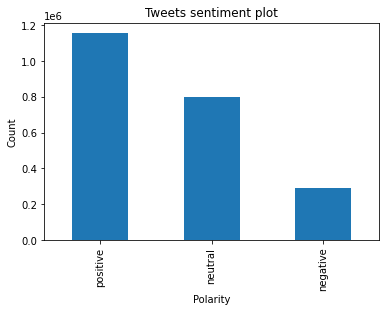

In [25]:
df['polarity_cat'].value_counts().plot(kind="bar")
plt.title("Tweets sentiment plot")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

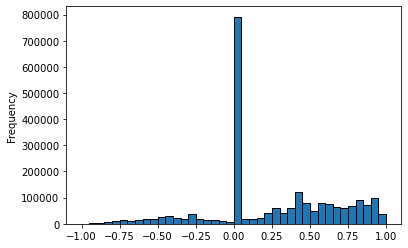

In [26]:
df.polarity_score.plot(kind='hist',range=(-1,1),bins=40,edgecolor='black');

In [27]:
df_positive=df.loc[df.polarity_cat=="positive"]
df_negative=df.loc[df.polarity_cat=="negative"]
df_neutral=df.loc[df.polarity_cat=="neutral"]

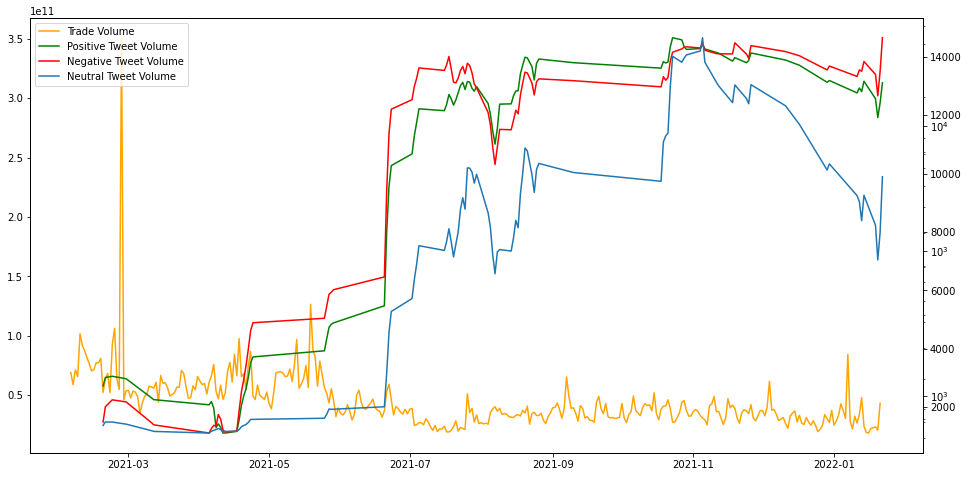

Spearman correlation - tweets: corr=-0.5546409824039936 pval=4.71694354952926e-10
Spearman correlation - tweets: corr=-0.5609347722032644 pval=2.719058096907959e-10
Spearman correlation - tweets: corr=-0.5348823916087914 pval=2.4733825572031115e-09


In [28]:
tweet_shift_positive = df_positive.groupby('date').size().shift(-1) 
tweet_shift_negative = df_negative.groupby('date').size().shift(-1) 
tweet_shift_neutral = df_neutral.groupby('date').size().shift(-1)

stocks_data = btc_stock['Volume'].dropna()

corr_positive, pval_positive = stat.spearmanr(tweet_shift_positive.reindex(stocks_data.index), stocks_data,nan_policy='omit')
corr_negative, pval_negative = stat.spearmanr(tweet_shift_negative.reindex(stocks_data.index), stocks_data,nan_policy='omit')
corr_neutral, pval_neutral = stat.spearmanr(tweet_shift_neutral.reindex(stocks_data.index), stocks_data,nan_policy='omit')

tweets_vol_positive = df_positive.groupby('date').size().rolling(10).mean()
tweets_vol_negative = df_negative.groupby('date').size().rolling(10).mean()
tweets_vol_neutral = df_neutral.groupby('date').size().rolling(10).mean()

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
ax3.set_yscale('log')

ax2 = ax.twinx()
ax2.plot(tweets_vol_positive.index,tweets_vol_positive,label='Positive Tweet Volume', color="green")
ax2.set_yscale('log')
ax2.tick_params(axis='y')

ax3 = ax.twinx()
ax3.plot(tweets_vol_negative.index,tweets_vol_negative,label='Negative Tweet Volume', color="red")
ax3.set_yscale('log')

ax4 = ax.twinx()
ax4.plot(tweets_vol_neutral.index,tweets_vol_neutral,label='Neutral Tweet Volume')
ax4.tick_params(axis='y')
ax3.set_yscale('log')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc=0)

plt.show()

print("Spearman correlation - tweets: corr={} pval={}".format(corr_positive,pval_positive))
print("Spearman correlation - tweets: corr={} pval={}".format(corr_negative,pval_negative))
print("Spearman correlation - tweets: corr={} pval={}".format(corr_neutral,pval_neutral))

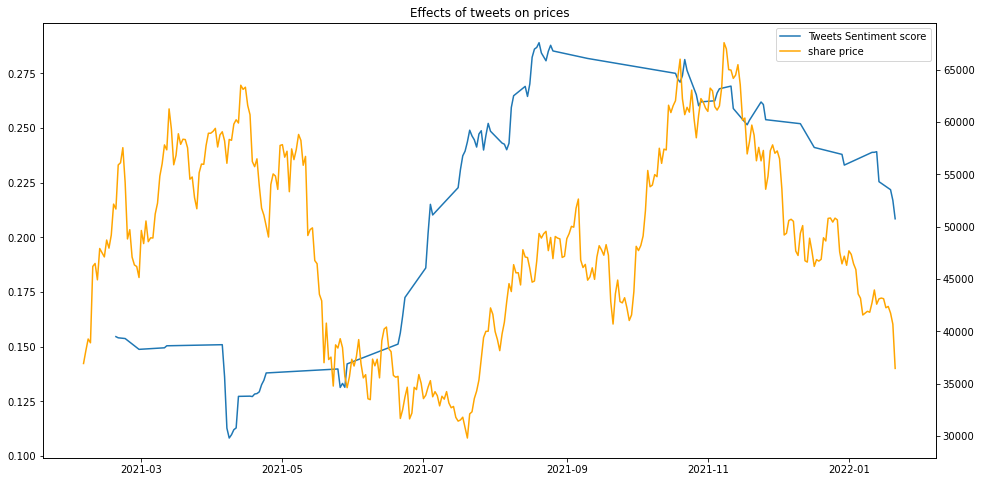

Spearman correlation: corr=-0.07081273162041404 pval=0.4664548869806413


In [29]:
sentiment= df.groupby('date')['polarity_score'].mean().shift(-1).rolling(10).mean()
corr_test = df.groupby('date')['polarity_score'].mean().shift(-1)
corr, pval = stat.spearmanr(corr_test.reindex(btc_stock.index), btc_stock['Open'],nan_policy='omit')

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(sentiment.index,sentiment,label='Tweets Sentiment score')
ax2 = ax.twinx()
ax2.plot(btc_stock.index,btc_stock['Close'],color='orange',label='share price')
ax2.set_title("Effects of tweets on prices")

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

print("Spearman correlation: corr={} pval={}".format(corr,pval))